In [141]:
from sklearn.cluster import KMeans
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score  
from sklearn.metrics import classification_report ,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [142]:
df=pd.read_csv("../data/processed/data_v1.csv")

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221948 entries, 0 to 1221947
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   TP2              1221948 non-null  float64
 1   TP3              1221948 non-null  float64
 2   H1               1221948 non-null  float64
 3   DV_pressure      1221948 non-null  float64
 4   Reservoirs       1221948 non-null  float64
 5   Oil_temperature  1221948 non-null  float64
 6   Motor_current    1221948 non-null  float64
 7   COMP             1221948 non-null  float64
 8   DV_eletric       1221948 non-null  float64
 9   Towers           1221948 non-null  float64
 10  MPG              1221948 non-null  float64
 11  LPS              1221948 non-null  float64
 12  Pressure_switch  1221948 non-null  float64
 13  Oil_level        1221948 non-null  float64
 14  Caudal_impulses  1221948 non-null  float64
 15  Air_Leak         1221948 non-null  int64  
dtypes: float64(15), in

In [144]:
df.duplicated().sum()

32554

In [145]:
df.drop_duplicates(inplace=True)

In [146]:
X=df.drop(columns=["Air_Leak"])
y = df["Air_Leak"]


In [147]:
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_over, y_over = smote.fit_resample(X, y)

under_sampling = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_under, y_under = under_sampling.fit_resample(X, y)

### 1.unbalanced dataset


In [148]:
df['Air_Leak'].sum()/ df.shape[0] * 100

2.111831739524497

In [149]:
y = df["Air_Leak"]
df.drop("Air_Leak", axis= 1, inplace= True)

In [150]:
kmeans = KMeans(n_clusters=2).fit(df)
labels = kmeans.labels_

In [151]:
print("Size of cluster 0:",len(labels)- labels.sum())
print("Size of cluster 1:",labels.sum())

Size of cluster 0: 486695
Size of cluster 1: 702699


In [152]:
from sklearn.metrics import precision_score
print("Precision=","%.2f" % round(precision_score(y,labels), 2))

from sklearn.metrics import recall_score
print("Recall=","%.2f" % round(recall_score(y,labels), 2))

from sklearn.metrics import f1_score
print("F-Score=","%.2f" % round(f1_score(y,labels), 2))

Precision= 0.00
Recall= 0.00
F-Score= 0.00


### 2.balanced datatet oversampling


In [153]:
scaler=MinMaxScaler()
x_over_scaled=scaler.fit_transform(X_over)


In [154]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_over_scaled)

KMeans(n_clusters=2, random_state=42)

In [155]:
labels=kmeans.labels_

In [156]:
conf_matrix = confusion_matrix(y_over, labels)


In [157]:
# Determine the mapping (which cluster corresponds to which class)
mapping = {}
for i in range(len(conf_matrix)):
    mapping[i] = np.argmax(conf_matrix[i])

mapped_labels = np.array([mapping[label] for label in labels])

# Evaluate metrics
precision = precision_score(y_over, mapped_labels)
recall = recall_score(y_over, mapped_labels)
f1 = f1_score(y_over, mapped_labels)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.88
Recall: 1.00
F1-Score: 0.94


In [161]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Apply SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_over, y_over = smote.fit_resample(X, y)

# Scale the data
scaler = StandardScaler()
X_over_scaled = scaler.fit_transform(X_over)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_over_scaled)
cluster_labels = kmeans.labels_

# Map cluster labels to true class labels (optional, based on majority voting)
from scipy.stats import mode
mapped_labels = np.zeros_like(cluster_labels)
for cluster in np.unique(cluster_labels):
    mask = cluster_labels == cluster
    mapped_labels[mask] = mode(y_over[mask])[0]

# Evaluate clustering
precision = precision_score(y_over, mapped_labels)
recall = recall_score(y_over, mapped_labels)
f1 = f1_score(y_over, mapped_labels)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.88
Recall: 1.00
F1-Score: 0.94


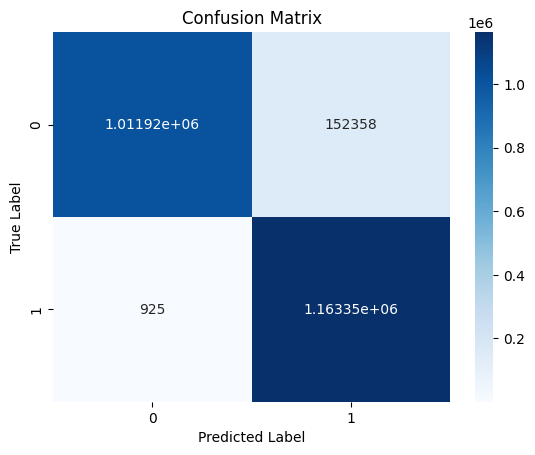

In [164]:
conf_matrix = confusion_matrix(y_over, mapped_labels)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 3.balanced datatset undersampling

In [160]:
X_under_scaled = scaler.fit_transform(X_under)

kmeans_under = KMeans(n_clusters=2, random_state=42)
kmeans_under.fit(X_under_scaled)


KMeans(n_clusters=2, random_state=42)

In [165]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np

# Apply SMOTE
smote = RandomUnderSampler(sampling_strategy="auto", random_state=42)
X_under, y_under = smote.fit_resample(X, y)

# Scale the data
scaler = StandardScaler()
X_under_scaled = scaler.fit_transform(X_under)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_under_scaled)
cluster_labels = kmeans.labels_

# Map cluster labels to true class labels (optional, based on majority voting)
from scipy.stats import mode
mapped_labels = np.zeros_like(cluster_labels)
for cluster in np.unique(cluster_labels):
    mask = cluster_labels == cluster
    mapped_labels[mask] = mode(y_under[mask])[0]

# Evaluate clustering
precision = precision_score(y_under, mapped_labels)
recall = recall_score(y_under, mapped_labels)
f1 = f1_score(y_under, mapped_labels)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.89
Recall: 1.00
F1-Score: 0.94


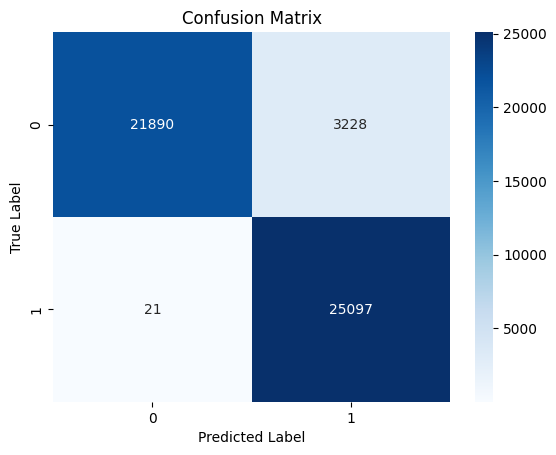

In [166]:
conf_matrix = confusion_matrix(y_under, mapped_labels)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()